# Trabalho final de NLP

In [39]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8')

## Leitura da base de dados de reclamações

In [2]:
df = pd.read_csv("base_reclamações.csv")
df.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,NaN,Telefonia Fixa ( Plano de Expansão / Compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos


## Análise exploratória dos dados fornecidos

In [3]:
df.describe()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
count,42307,42307,42306,35777,36978,42307,33371,42307
unique,5,17,11212,8864,556,193,167,8
top,Centro-oeste,SP,TELEFONICA BRASIL S/A,VIVO/TELEFÔNICA,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL","Telefone ( Convencional, Celular, Interfone, E...",Produto com vício,entre 31 a 40 anos
freq,16459,8127,846,799,3635,5149,6043,9372


In [4]:
df.shape

(42307, 8)

In [5]:
df.isnull().sum()

Regiao             0
estado             0
empresa            1
subsidiaria     6530
area            5329
serviço            0
problema        8936
faixa etarea       0
dtype: int64

### Removendo o registro com empresa vazia.

In [6]:
df_empresa = pd.DataFrame(df.empresa)
df_empresa

,empresa
0,ITAÚ UNIBANCO S/A
1,CLARO S/A
2,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO
3,GNN GARAGENS LTDA - EPP
4,CLARO S/A
...,...
42302,B2W COMPANHIA DIGITAL
42303,ADIDAS DO BRASIL LTDA
42304,RN COMERCIO VAREJISTA S/A
42305,DECOLAR.COM LTDA


In [7]:
df_empresa.dropna(inplace = True)

In [8]:
df_empresa.isnull().sum()

empresa    0
dtype: int64

### Tratando nome das empresas para remover caracteres especiais e passando todas para minúsculas

In [9]:
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_empresa["Nome Empresa Sem Espaço"] = df_empresa.replace({'empresa': dicionario},regex=True)
df_empresa["Nome Empresa Sem Espaço"] = df_empresa["Nome Empresa Sem Espaço"].str.lower()

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\)'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\)'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\dofra\AppData\Local\Temp\ipykernel_6120\2986845979.py:1: SyntaxWarning: invalid escape sequence '\('
  dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
C:\Users\dofra\AppData\Local\Temp\ipykernel_6120\2986845979.py:1: SyntaxWarning: invalid escape sequence '\)'
  dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
C:\Users\dofra\AppData\Local\Temp\ipykernel_6120\2986845979.py:1: SyntaxWarning: invalid escape sequence '\.'
  dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}


Text(0, 0.5, 'Contagem de reclamações')

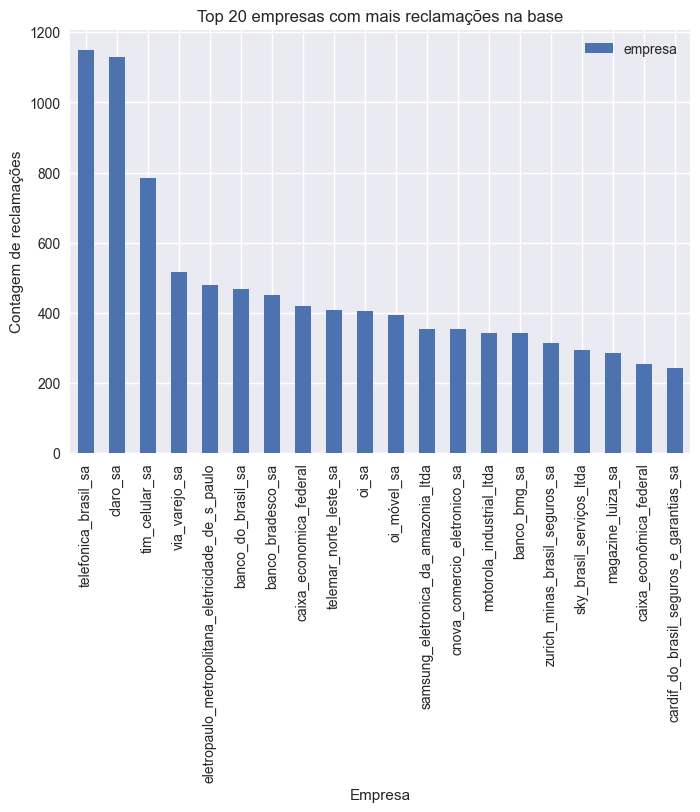

In [41]:
df_agrupado = df_empresa.groupby("Nome Empresa Sem Espaço").count()

df_ordenado = df_agrupado.sort_values(by = "empresa",ascending=False)

df_top_20 = df_ordenado.head(20)

df_top_20.plot(kind = "bar")
plt.title("Top 20 empresas com mais reclamações na base")
plt.xlabel("Empresa")
plt.ylabel("Contagem de reclamações")

## Iniciando configuração e parâmetros necessários para wordcloud

In [42]:
string_empresas = " ".join(df_empresa["Nome Empresa Sem Espaço"])
string_empresas

'itaú_unibanco_sa claro_sa eletropaulo_metropolitana_eletricidade_de_s_paulo gnn_garagens_ltda__epp claro_sa aerovias_del_continente_americano_sa b2w_companhia_digital telefonica_brasil_sa winner_fit_academia superfor_sp_veículos_ltda motorola_mobility_comercio_de_produtos_eletr_ltda portoseg_sa_credito_financiamento_e_investimento banco_pan_sa comercial_zena_móveis_sociedade_ltda bradesco_vida_e_previdencia_sa banco_cetelem_sa sascar_tecnologia_e_segurança_automotiva_sa eletropaulo_metropolitana_eletricidade_de_s_paulo bradesco_autore_companhia_de_seguros banco_pan_sa banco_bmg_sa eletropaulo_metropolitana_eletricidade_de_s_paulo castelo_verde_comercio_de_moveis_ltda__me centro_de_formacao_de_condutores_b_robles_penha_ltda_me medisanitas_brasil_assistencia_integral_a_saúde_sa sicoob_coopercredisp tim_celular_sa lima_negociacoes_financeiras_eireli__me acbz_importação_e_comércio_ltda mobpanda_moveis_e_decoracoes_ltda_epp castelo_verde_comercio_de_moveis_ltda__me oi_móvel_sa ssk_escola_d

## WordCloud para 40 empresas

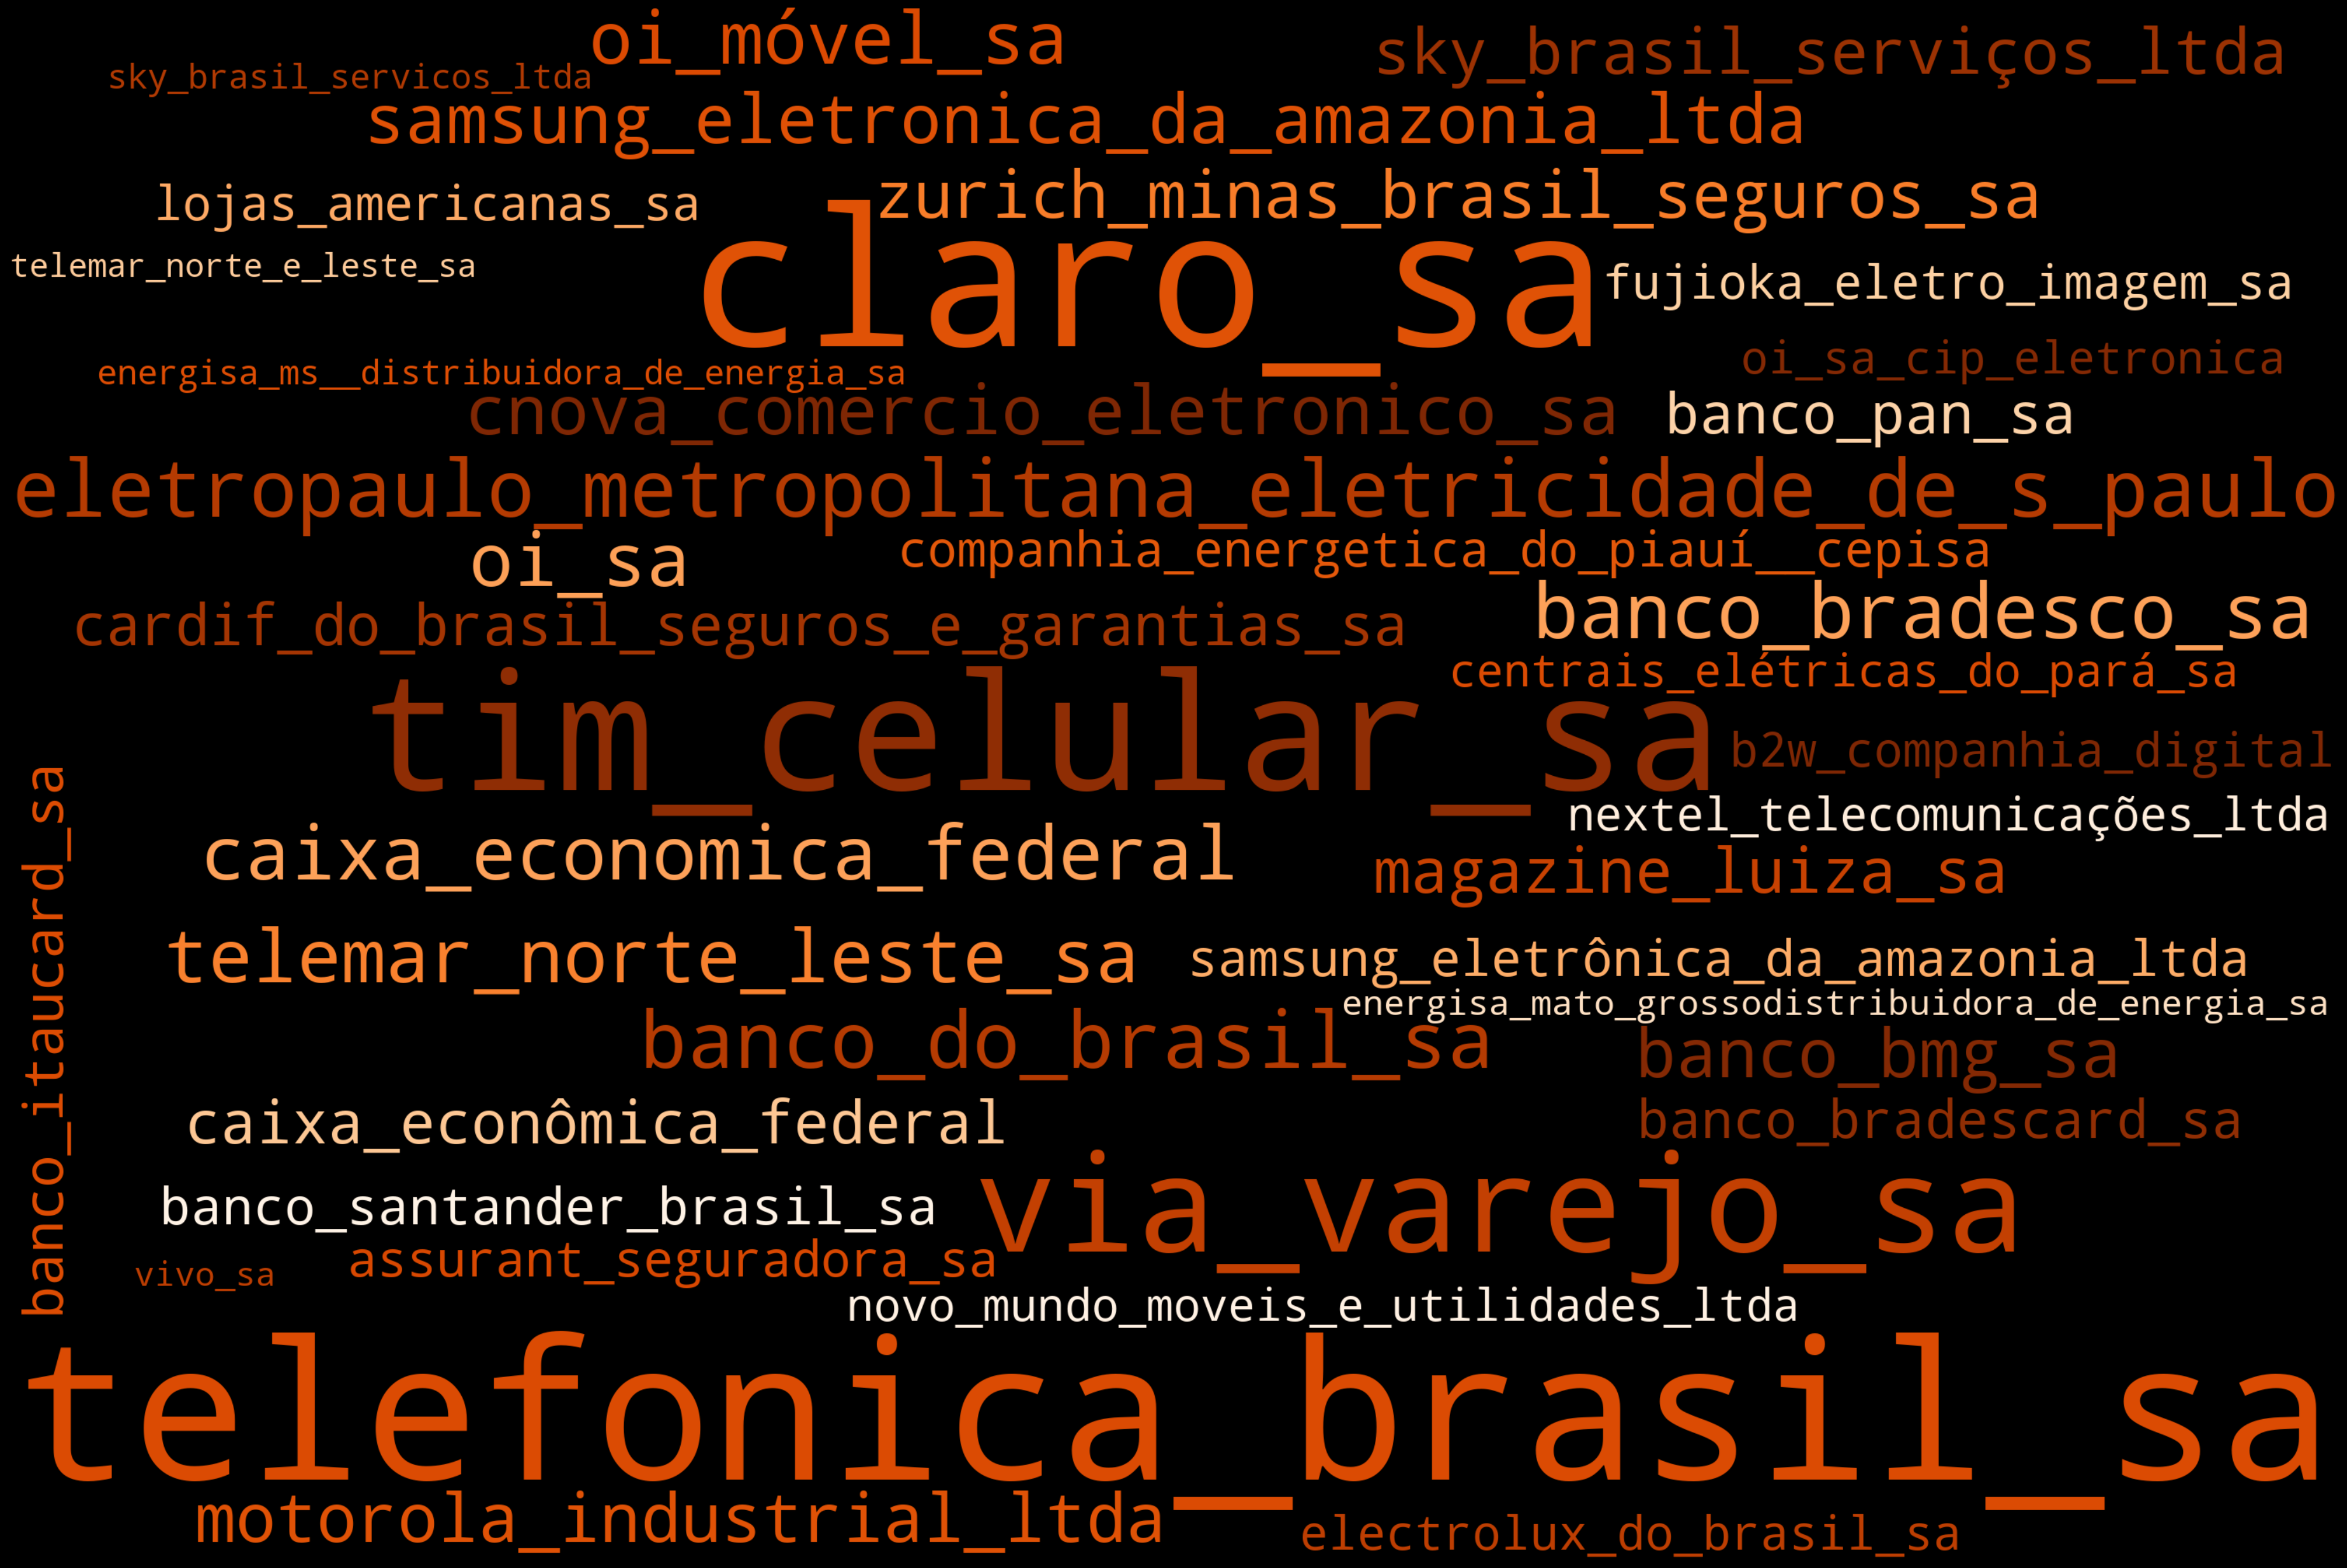

In [45]:
wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_empresas)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
#plt.savefig("Empresa_wordcloud.png")
plt.show()

## WordCloud para Estados com mais reclamações

In [48]:
string_estados = " ".join(df.estado.dropna().astype(str))
string_estados

'SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP PA PA PA PA PA PA PA PA PA PA PA PA SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP RO RO RO RO RO RO RO RO RO RO RO RO SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP PA PA PA PA PA RO RO RO RO RO RO PA RO RO RO RO RO RO RO RO RO RO RO RO MA MA MA RO RO RO RO MA MA RO RO RO RO RO RO RO RO RO RO RO RO RO RO RO SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SC SC SC SC SC SC SC SC SC SC SC SC SC RO RO RO RO RO RO RO RN RN RO RO RO RN RN RN RN RN SP SP SP SP SP SP RN RN RN RN RN RN SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP SP RN RO RO RO RO RO RO RO RO RO RO RO RO RO RO RO RO RO RO RO RO RO RN RN RN RN RN RN RN RN RN RN RN RN RN RN RN RO RO RO RO RO RO RO RO RO RO RO RO RO RO RO 